In [1]:
## Import Libraries
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from time import time
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import *
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from boruta import BorutaPy
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
#settingparameters 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_seq_items = 2000

In [83]:
df = pd.read_csv('/Users/z3433848/Desktop/DSI/Capstone/df.csv')

In [4]:
#checking dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   xG                          174 non-null    float64
 1   xGA                         174 non-null    float64
 2   Poss                        174 non-null    int64  
 3   Touches                     174 non-null    int64  
 4   Press                       174 non-null    int64  
 5   Tkl                         174 non-null    int64  
 6   Int                         174 non-null    int64  
 7   Blocks                      174 non-null    int64  
 8   xG_Expected                 174 non-null    float64
 9   npxG_Expected               174 non-null    float64
 10  xA_Expected                 174 non-null    float64
 11  Att_Passes                  174 non-null    int64  
 12  Cmp_percent_Passes          174 non-null    float64
 13  Prog_Passes                 174 non

In [84]:
#defining feature and target columns
target_col = 'win_nowin'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols]
y= df[target_col]

In [6]:
X.values

array([[1.300e+00, 8.000e-01, 6.300e+01, ..., 2.780e+01, 3.000e+00,
        3.430e+02],
       [8.000e-01, 6.000e-01, 3.200e+01, ..., 1.280e+01, 0.000e+00,
        4.231e+03],
       [1.100e+00, 6.000e-01, 5.600e+01, ..., 1.720e+01, 1.000e+00,
        3.430e+02],
       ...,
       [5.000e-01, 7.000e-01, 4.400e+01, ..., 1.830e+01, 3.000e+00,
        3.430e+02],
       [7.000e-01, 6.000e-01, 5.600e+01, ..., 1.420e+01, 1.000e+00,
        4.222e+03],
       [9.000e-01, 4.000e-01, 6.500e+01, ..., 1.200e+01, 0.000e+00,
        4.141e+03]])

In [7]:
y.value_counts()

1    93
0    81
Name: win_nowin, dtype: int64

In [85]:
# splitting test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [86]:
# fitting model using training data 
lr = LogisticRegression(solver='saga', C=100, random_state=100)
lr.fit(X_train, y_train)

LogisticRegression(C=100, random_state=100, solver='saga')

In [87]:
# Cross-validate the data using Repeatead Stratified K Fold (10 splits)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.600 (0.069)


/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear

In [11]:
print(n_scores)

[0.55555556 0.5        0.66666667 0.66666667 0.58823529 0.64705882
 0.58823529 0.70588235 0.58823529 0.58823529 0.55555556 0.5
 0.55555556 0.61111111 0.64705882 0.70588235 0.47058824 0.70588235
 0.70588235 0.52941176 0.55555556 0.61111111 0.55555556 0.66666667
 0.64705882 0.64705882 0.52941176 0.58823529 0.64705882 0.47058824]


Accuracy score = 0.5714285714285714
              precision    recall  f1-score   support

           0       0.38      0.55      0.44        11
           1       0.74      0.58      0.65        24

    accuracy                           0.57        35
   macro avg       0.56      0.56      0.55        35
weighted avg       0.62      0.57      0.59        35



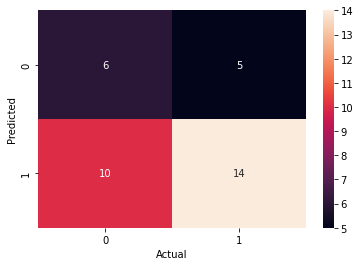

In [88]:
y_pred_lr = lr.predict(X_test)
ac = accuracy_score(y_test,y_pred_lr)
print('Accuracy score =',ac)
cm = confusion_matrix(y_test, y_pred_lr)
s= sns.heatmap(cm,annot=True,fmt="d")
s.set(xlabel='Actual', ylabel='Predicted')
print(classification_report(y_test, y_pred_lr))

In [13]:
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = lr.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Logistic Regression')
    plt.legend(loc = "lower right")
    plt.show()

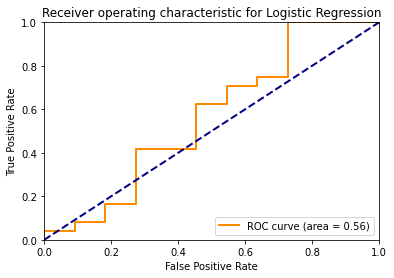

In [14]:
# Area under ROC for test data 
plot_roc_curve(X_test, y_test)

In [36]:
# Define Random Forest Classifier Model 
model = RandomForestClassifier(n_estimators = 50, random_state = 100)
print(model)

RandomForestClassifier(n_estimators=50, random_state=100)


In [37]:
# Fit Random Forest Classifier 
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [38]:
# Cross-validate the data using Repeatead Stratified K Fold (10 splits)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.833 (0.084)


In [39]:
print(n_scores)

[0.77777778 0.94444444 0.72222222 1.         0.82352941 0.94117647
 0.82352941 0.70588235 0.82352941 0.70588235 0.77777778 0.94444444
 0.94444444 0.83333333 0.88235294 0.82352941 0.88235294 0.94117647
 0.82352941 0.76470588 0.77777778 0.83333333 0.83333333 0.83333333
 0.76470588 0.76470588 0.82352941 0.88235294 0.64705882 0.94117647]


In [40]:
# Defining function to show summary report 
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [41]:
# Calculating predictings and probablities using Y test values 

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.7429 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8947 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7083 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8807                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


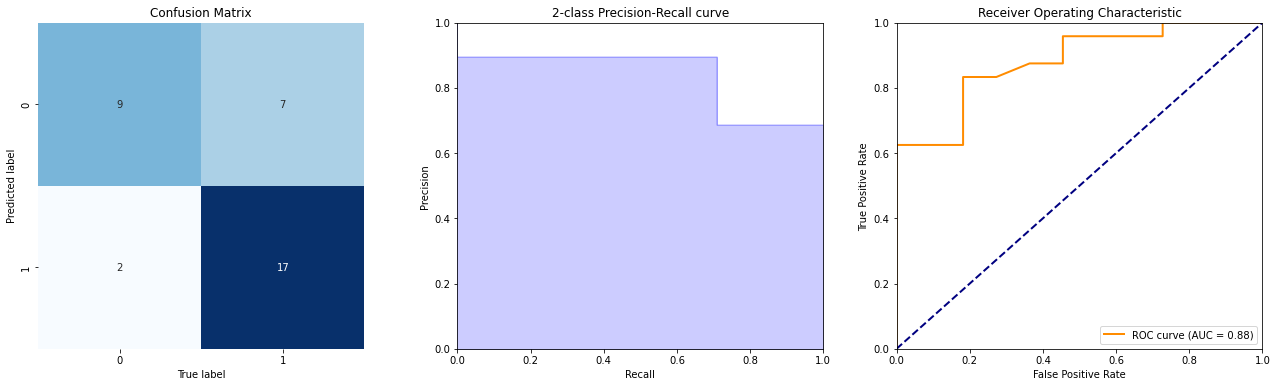

In [42]:
show_summary_report(y_test, y_test_pred, y_test_prob)

In [53]:
# gridsearch Random Forest

rf_params = {
    'n_estimators': [10,50,100],
    'criterion': ['gini','entropy'],
    'max_features' : ['auto', 'log2', 'none']
}

gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params, cv=5, verbose =1)


In [54]:
gs.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'none'],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [55]:
gs.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}

In [59]:
# Defining new model 
model2 = RandomForestClassifier(criterion = 'entropy', n_estimators = 50, random_state = 100)

In [60]:
# Fit Random Forest Classifier 
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=100)

In [61]:
# Cross-validate the data using Repeatead Stratified K Fold (10 splits)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.828 (0.072)


In [62]:
print(n_scores)

[0.72222222 0.83333333 0.72222222 0.94444444 0.70588235 0.88235294
 0.94117647 0.82352941 0.76470588 0.76470588 0.72222222 0.88888889
 0.72222222 0.83333333 0.76470588 0.88235294 0.82352941 0.94117647
 0.88235294 0.82352941 0.77777778 0.83333333 0.83333333 0.77777778
 0.82352941 0.82352941 0.88235294 0.94117647 0.82352941 0.94117647]


In [63]:
# Calculating predictings and probablities using Y test values 

y2_test_pred = model2.predict(X_test)
y2_test_prob = model2.predict_proba(X_test)

Accuracy : 0.7429 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8947 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7083 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8561                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


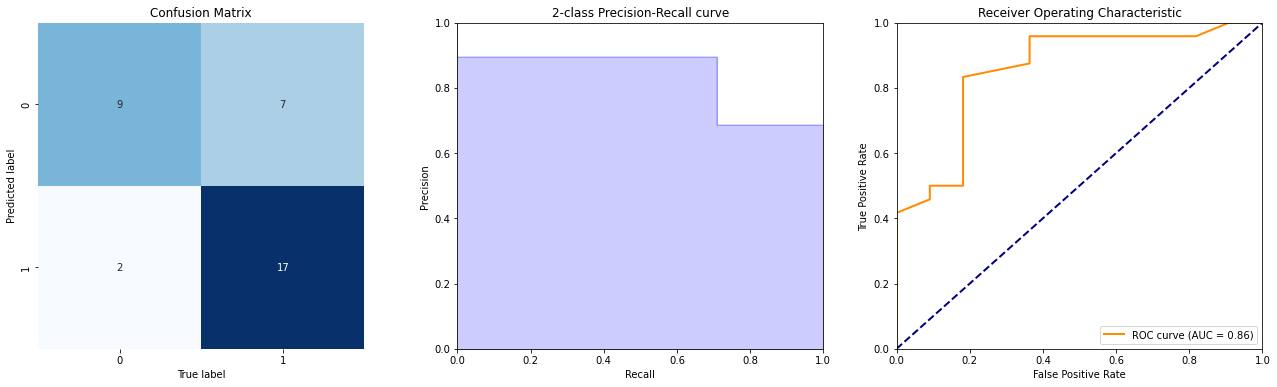

In [64]:
show_summary_report(y_test, y2_test_pred, y2_test_prob)

In [65]:
# feature selection using Sequential Feature Selector for Random Forest

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(model, n_features_to_select=None, direction="forward").fit(X, y)
toc_fwd = time()
print(
    "Features selected by forward sequential selection: "
    f"{sfs_forward.get_support([df.columns])}"
)

Features selected by forward sequential selection: [ 1  2  3  4  5  6  7  9 11 12 15 16 18 19 20 25 28 29 33 34 36 39 41 43
 46 47 48 49 53 55 59 60 63 70 72 75 76 80 81 84 85 86 87 88 90 91]


In [91]:
#Filter dataframe from the features selected
df2 = df.iloc[:,[1,  2 , 3 , 4 , 5,  6 , 7  ,9, 11, 12 ,15 ,16, 18, 19 ,20, 25, 28, 29, 33, 34, 36, 39 ,41, 43,
 46, 47 ,48 ,49 ,53, 55, 59, 60, 63, 70, 72 ,75 ,76, 80, 81 ,84, 85, 86 ,87, 88, 90, 91,92]]

In [92]:
#Redefining X and y
target_col = 'win_nowin'
feature_cols = [c for c in df2.columns if c != target_col]

X = df2[feature_cols]
y= df2[target_col]

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   xGA                         174 non-null    float64
 1   Poss                        174 non-null    int64  
 2   Touches                     174 non-null    int64  
 3   Press                       174 non-null    int64  
 4   Tkl                         174 non-null    int64  
 5   Int                         174 non-null    int64  
 6   Blocks                      174 non-null    int64  
 7   npxG_Expected               174 non-null    float64
 8   Att_Passes                  174 non-null    int64  
 9   Cmp_percent_Passes          174 non-null    float64
 10  Succ_Dribbles               174 non-null    int64  
 11  Att_Dribbles                174 non-null    int64  
 12  TotDist_Total               174 non-null    int64  
 13  PrgDist_Total               174 non

In [94]:
y.value_counts()

1    93
0    81
Name: win_nowin, dtype: int64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 96 to 8
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   xGA                         139 non-null    float64
 1   Poss                        139 non-null    int64  
 2   Touches                     139 non-null    int64  
 3   Press                       139 non-null    int64  
 4   Tkl                         139 non-null    int64  
 5   Int                         139 non-null    int64  
 6   Blocks                      139 non-null    int64  
 7   npxG_Expected               139 non-null    float64
 8   Att_Passes                  139 non-null    int64  
 9   Cmp_percent_Passes          139 non-null    float64
 10  Succ_Dribbles               139 non-null    int64  
 11  Att_Dribbles                139 non-null    int64  
 12  TotDist_Total               139 non-null    int64  
 13  PrgDist_Total               139 non-

In [96]:
model = RandomForestClassifier(n_estimators = 50, random_state = 100)

In [97]:
# Fit Random Forest Classifier 
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [98]:
# Cross-validate the data using Repeatead Stratified K Fold (10 splits)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.891 (0.070)


In [99]:
print(n_scores)

[0.88888889 0.88888889 0.83333333 0.94444444 0.88235294 0.82352941
 0.82352941 0.76470588 0.94117647 0.88235294 0.83333333 1.
 1.         0.94444444 0.82352941 0.82352941 0.88235294 1.
 0.88235294 0.76470588 0.83333333 0.77777778 0.88888889 0.94444444
 0.94117647 1.         0.94117647 0.88235294 0.88235294 1.        ]


In [100]:
# Calculating predictings and probablities using Y test values 

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.7714 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7500 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8864                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


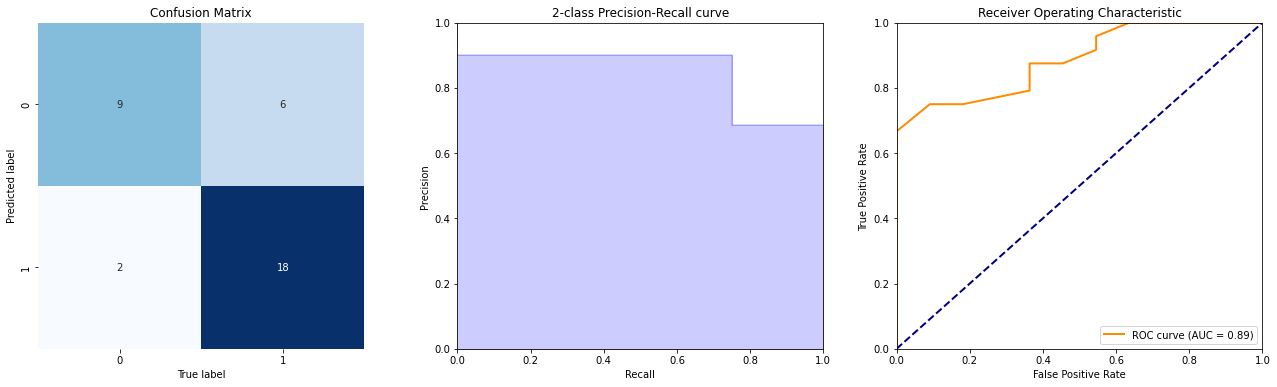

In [77]:
show_summary_report(y_test, y_test_pred, y_test_prob)

In [116]:
# LR for updated features 
lr2 = LogisticRegression(solver='saga', C=100, random_state=100)
lr2.fit(X_train, y_train)

LogisticRegression(C=100, random_state=100, solver='saga')

In [118]:
# Cross-validate the data using Repeatead Stratified K Fold (10 splits)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(lr2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.589 (0.083)


/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/z3433848/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear

Accuracy score = 0.5714285714285714
              precision    recall  f1-score   support

           0       0.38      0.55      0.44        11
           1       0.74      0.58      0.65        24

    accuracy                           0.57        35
   macro avg       0.56      0.56      0.55        35
weighted avg       0.62      0.57      0.59        35



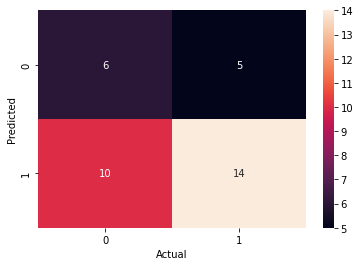

In [120]:
#Confusion Matrix for new LR
y_pred_lr2 = lr2.predict(X_test)
ac = accuracy_score(y_test,y_pred_lr)
print('Accuracy score =',ac)
cm = confusion_matrix(y_test, y_pred_lr)
s= sns.heatmap(cm,annot=True,fmt="d")
s.set(xlabel='Actual', ylabel='Predicted')
print(classification_report(y_test, y_pred_lr))

In [80]:
# creating shapely explainer variable to explore feature importance 

explainer = shap.TreeExplainer(model)

In [81]:
# get shap values for the features 

shap_values = explainer.shap_values(X_train)

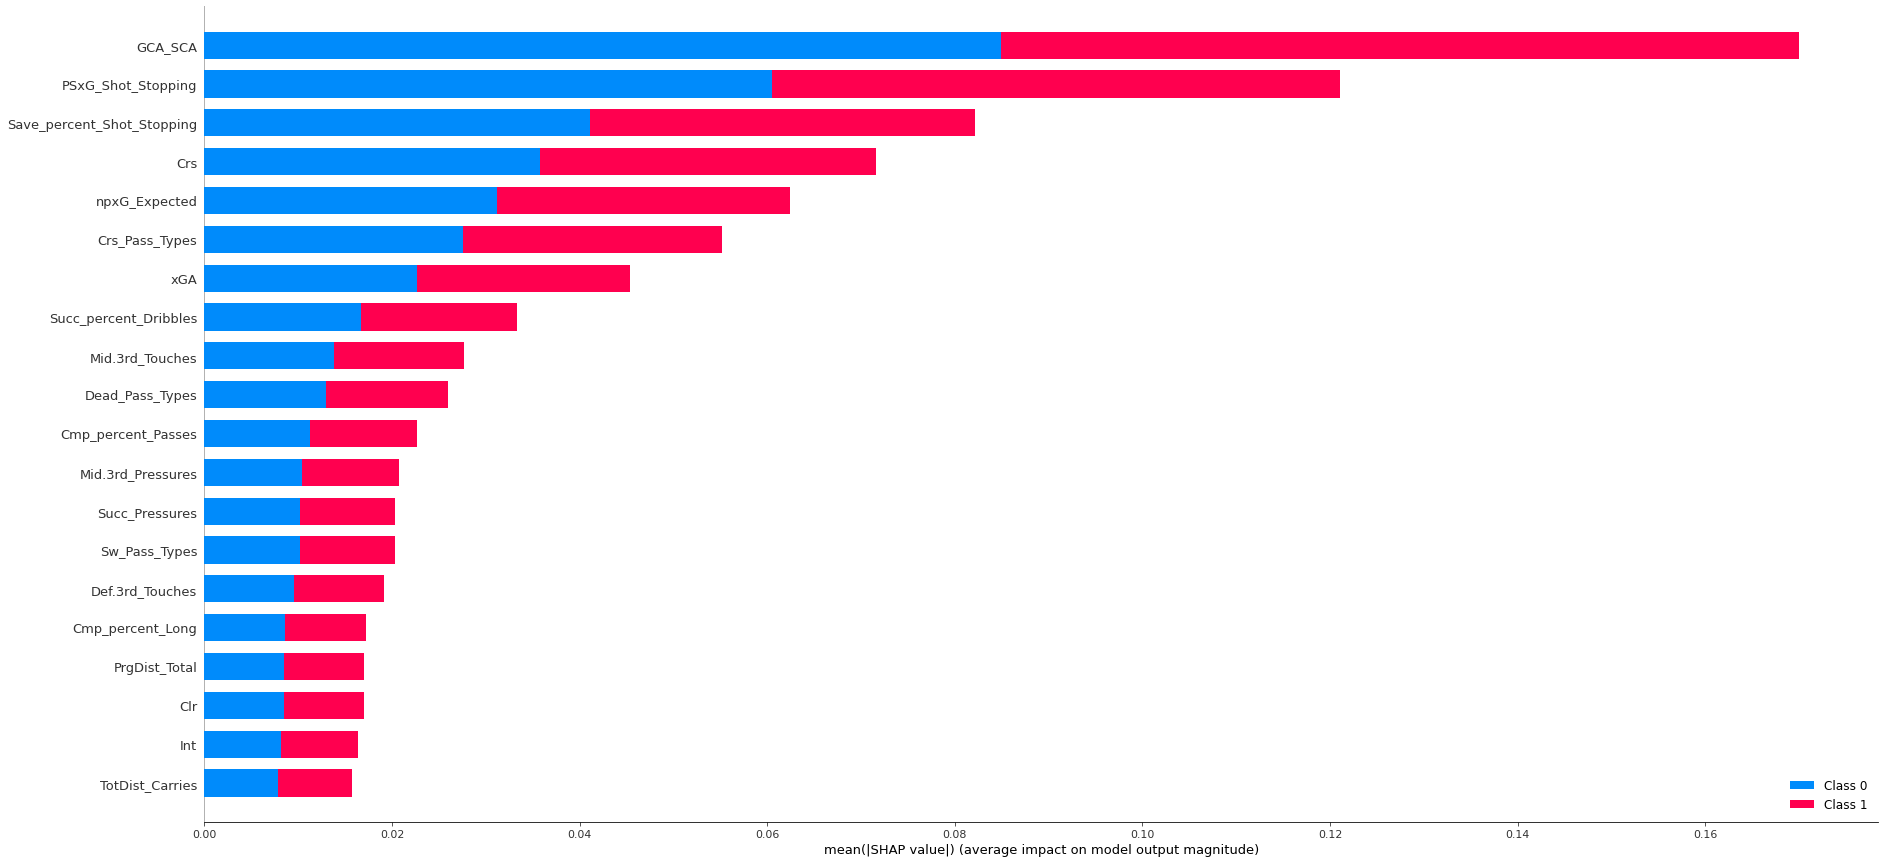

In [82]:
#Plot feature imporantce according to shap values 

plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_train, # Use training set features
                             feature_names=X_train.columns, #Use column names
                             plot_size=(30,15)) # Change plot size
plt.show()

In [121]:
 # Compute ROC curve and ROC area for LR 
    preds2 = lr2.predict_proba(X_test)[:,1]
    fpr1, tpr1, _ = metrics.roc_curve(y_test, preds2)

    # Store the Area Under the Curve (AUC) for Logistic regression so we can annotate our graph with theis metric
    roc_auc1 = metrics.auc(fpr1, tpr1)

In [102]:
# Compute ROC curve and ROC area for Random Forest
fpr2, tpr2, _ = roc_curve(y_test, y_test_prob[:, 1])
roc_auc2 = auc(fpr2, tpr2)

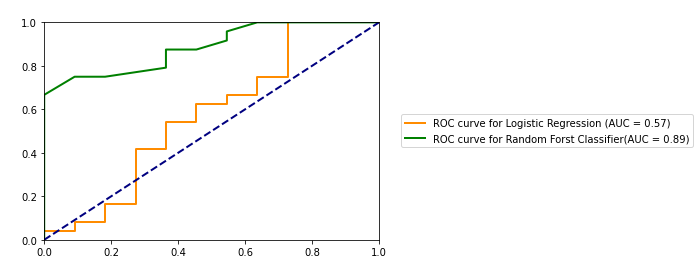

In [122]:
#Plot ROC comparison
ax = plt.axes()

# plot ROC curves
ax.plot(fpr1, tpr1, color = 'darkorange', lw = 2, label = 'ROC curve for Logistic Regression (AUC = %0.2f)' % roc_auc1) #ROC for model1 (LR)
ax.plot(fpr2, tpr2, color = 'green', lw = 2, label = 'ROC curve for Random Forst Classifier(AUC = %0.2f)' % roc_auc2) #ROC for model2 (RF)

ax.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate', color='white')
ax.set_ylabel('True Positive Rate', color='white')
ax.set_title('Receiver Operating Characteristic', color='white')
ax.legend(loc = 'lower right')
plt.legend(bbox_to_anchor = (1.05, 0.6))

plt.show()